In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
# check GPU details
!nvidia-smi
import cv2

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
# We import necessary Libraries

import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

#import openCV
import cv2
from PIL import Image

#importing tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import applications, optimizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
%matplotlib inline

Wed Jul  3 12:57:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              35W /  70W |  13697MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# check GPU details

!nvidia-smi

Wed Jul  3 12:57:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              35W /  70W |  13697MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

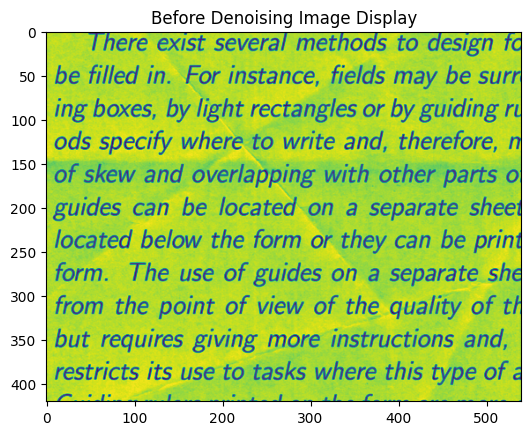

In [ ]:
# https://stackoverflow.com/a/35287898/10219869

import matplotlib.image as mpimg
img=mpimg.imread('/content/train/101.png')
imgplot = plt.imshow(img)
plt.title('Before Denoising Image Display')
plt.show()

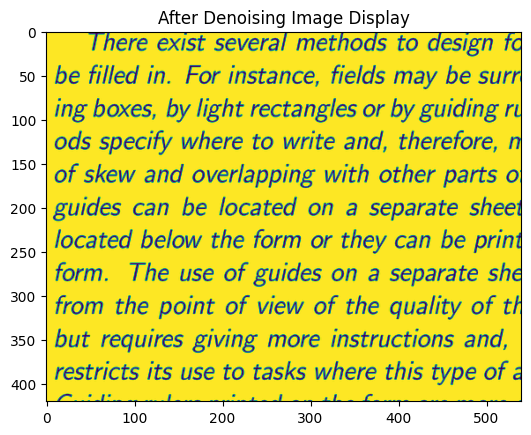

In [ ]:
# https://stackoverflow.com/a/35287898/10219869

import matplotlib.image as mpimg
img=mpimg.imread('/content/train_cleaned/101.png')
imgplot = plt.imshow(img)
plt.title('After Denoising Image Display')
plt.show()

In [ ]:
x_train= []

path= '/content/train/'
for i in os.listdir(path= path):
  x_train.append((path+str(i)))
print('Total images in train dataset: ',len(x_train))

y_train= []

path= '/content/train_cleaned/'
for i in os.listdir(path= path):
  y_train.append((path+str(i)))

print('Total images in train_cleaned dataset: ',len(y_train))

test= []

path= '/content/test/'
for i in os.listdir(path= path):
  test.append((path+str(i)))

print('Total images in test dataset: ',len(test))

Total images in train dataset:  144
Total images in train_cleaned dataset:  144
Total images in test dataset:  72


In [ ]:
x_train[:5]

['/content/train/30.png',
 '/content/train/63.png',
 '/content/train/27.png',
 '/content/train/3.png',
 '/content/train/201.png']

In [ ]:
# To check the sample size of the image

for i in x_train[:5]:
  img = cv2.imread(i)
  height, width, channels = img.shape
  print(img.shape)

(258, 540, 3)
(258, 540, 3)
(258, 540, 3)
(258, 540, 3)
(420, 540, 3)


In [ ]:
# To check max height and max width and min height and min width

# To check the sample size of the image

ht=[]
wd= []
for i in x_train:
  img = cv2.imread(i)
  height, width, channels = img.shape
  ht.append(img.shape[0])
  wd.append(img.shape[1])

print('Max Height of image in x_train', max(ht))
print('Min Height of image in x_train', min(ht))
print('Max Width of image in x_train', max(wd))
print('Min Width of image in x_train', max(wd))

Max Height of image in x_train 420
Min Height of image in x_train 258
Max Width of image in x_train 540
Min Width of image in x_train 540


In [ ]:
# To check max height and max width and min height and min width

# To check the sample size of the image

ht=[]
wd= []
for i in y_train:
  img = cv2.imread(i)
  height, width, channels = img.shape
  ht.append(img.shape[0])
  wd.append(img.shape[1])

print('Max Height of image in y_train', max(ht))
print('Min Height of image in y_train', min(ht))
print('Max Width of image in y_train', max(wd))
print('Min Width of image in y_train', max(wd))

Max Height of image in y_train 420
Min Height of image in y_train 258
Max Width of image in y_train 540
Min Width of image in y_train 540


In [ ]:
# we need to resize and rescale the images

new_shape = (258, 540, 1)
def load_images(path):
    image_list = []
    for i in path:
        img = cv2.imread(i,0) # read grayscale image
        img = cv2.resize(img, (new_shape[1], new_shape[0]))
        img = img / 255.
        img = np.expand_dims(img, axis=-1) # we get channel as 1 in output.
        image_list.append(img)
    return image_list

In [ ]:
new_x_train= load_images(x_train)
new_y_train= load_images(y_train)
new_test= load_images(test)

new_x_train[0].shape


(258, 540, 1)

In [ ]:
# convert to array as lists are not accepted in conv

new_x_train= np.array(new_x_train)
new_y_train= np.array(new_y_train)
new_test= np.array(new_test)

print('Shape of Single image:',new_x_train[0].shape)
print('Shape of All images:',new_x_train.shape)

Shape of Single image: (258, 540, 1)
Shape of All images: (144, 258, 540, 1)


In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(new_x_train, new_y_train, test_size=0.3, random_state=42)
print('Train data:',x_tr.shape)
print('Validation data:', x_val.shape)

Train data: (100, 258, 540, 1)
Validation data: (44, 258, 540, 1)


Encoder - Decoder Model


In [ ]:

#Encoder
model= Sequential()
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv1', input_shape= new_shape))
model.add(BatchNormalization(name= 'BN1'))
model.add(MaxPool2D((2,2), padding='same', name='pool1'))

#Decoder
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv2'))
model.add(UpSampling2D((2,2), name='upsample1'))
model.add(Conv2D(filters= 1, kernel_size= (3,3), activation='sigmoid', padding='same', name='Conv3'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 258, 540, 128)     1280      
                                                                 
 BN1 (BatchNormalization)    (None, 258, 540, 128)     512       
                                                                 
 pool1 (MaxPooling2D)        (None, 129, 270, 128)     0         
                                                                 
 Conv2 (Conv2D)              (None, 129, 270, 128)     147584    
                                                                 
 upsample1 (UpSampling2D)    (None, 258, 540, 128)     0         
                                                                 
 Conv3 (Conv2D)              (None, 258, 540, 1)       1153      
                                                                 
Total params: 150529 (588.00 KB)
Trainable params: 150

In [ ]:
# We compile and fit the model with loss, optimizers, and data

# https://www.kaggle.com/c/denoising-dirty-documents/overview/evaluation (Metrics was chosen by the Kaggle data owner)

model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['RootMeanSquaredError'])
history= model.fit(x= x_tr, y= y_tr, batch_size= 8, epochs= 500, validation_data= (x_val, y_val), )

Epoch 1/500
13/13 [==============================] - 3s 193ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0745
Epoch 2/500
13/13 [==============================] - 2s 189ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 3/500
13/13 [==============================] - 2s 187ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 4/500
13/13 [==============================] - 2s 187ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0493
Epoch 5/500
13/13 [==============================] - 2s 188ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 6/500
13/13 [==============================] - 2s 188ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0020 

In [ ]:
# We predict the model instead of evaluate as there are no y labels.

predictions= model.predict( x= new_test)
predictions.shape

3/3 [==============================] - 0s 206ms/step


(72, 258, 540, 1)

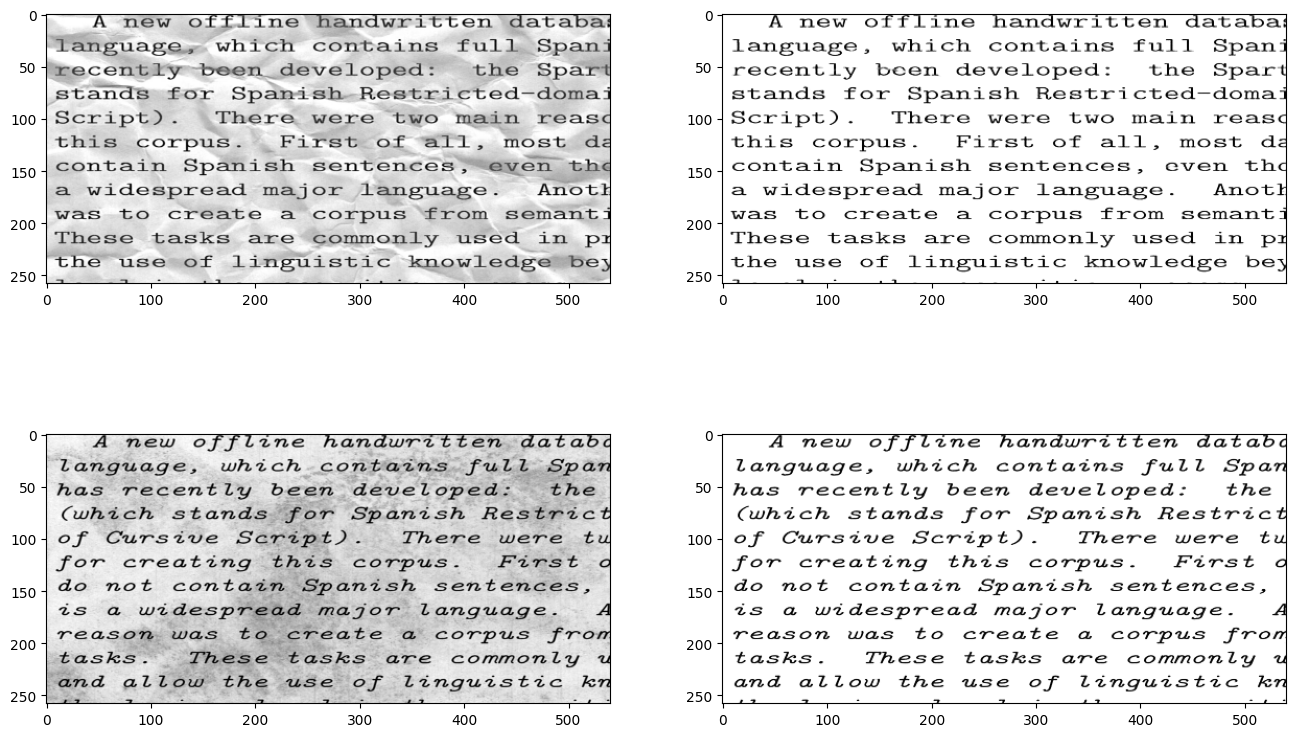

In [ ]:
# We check sample image
f, ax = plt.subplots(2,2, figsize=(16,10))

# # we need to reshape the image removing the channel as we are using 'plt.imshow'.
ax[0,0].imshow(new_test[0].reshape(258, 540), cmap='gray', )
ax[0,1].imshow(predictions[0].reshape(258, 540), cmap='gray')
ax[1,0].imshow(new_test[1].reshape(258, 540), cmap='gray')
ax[1,1].imshow(predictions[1].reshape(258, 540), cmap='gray')
plt.show()

In [ ]:
# Save the trained model
model.save('denoising_autoencoder_500.h5')


In [ ]:
from google.colab import files

# Download the saved model file
files.download('denoising_autoencoder_500.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 1)]   0         
                                                                 
 Conv1 (Conv2D)              (None, None, None, 128)   1280      
                                                                 
 BN1 (BatchNormalization)    (None, None, None, 128)   512       
                                                                 
 pool1 (MaxPooling2D)        (None, None, None, 128)   0         
                                                                 
 Conv2 (Conv2D)              (None, None, None, 128)   147584    
                                                                 
 upsample1 (UpSampling2D)    (None, None, None, 128)   0         
                                                                 
 Conv3 (Conv2D)              (None, None, None, 1)     1153

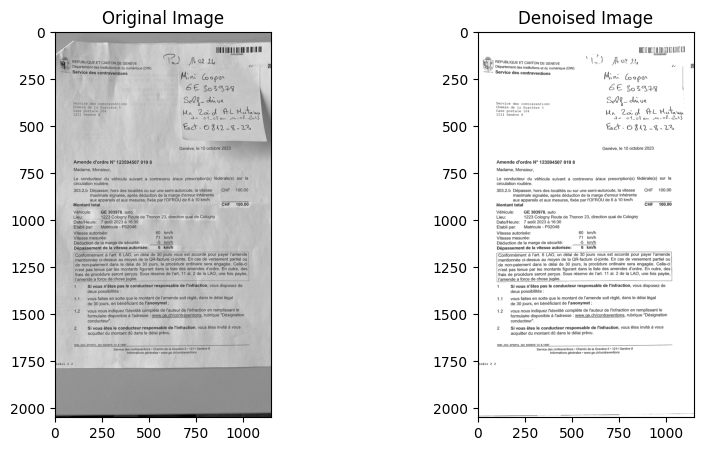

Denoised image saved at: /content/denoised_image.png


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Input

# Assuming the model has already been trained as per your script
input_shape = (None, None, 1)

# Rebuild the model using functional API
inputs = Input(shape=input_shape)

# Encoder
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='Conv1')(inputs)
x = BatchNormalization(name='BN1')(x)
x = MaxPooling2D((2, 2), padding='same', name='pool1')(x)

# Decoder
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2')(x)
x = UpSampling2D((2, 2), name='upsample1')(x)
outputs = Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same', name='Conv3')(x)

model = Model(inputs, outputs)
model.summary()

# Load the weights from the previously trained model
model.load_weights('denoising_autoencoder_500.h5')

# Function to preprocess a new image while keeping the original size
def preprocess_image(image_path):
    img = cv2.imread(image_path, 0)  # Load the image in grayscale
    img = img / 255.  # Normalize the pixel values
    img = np.expand_dims(img, axis=-1)  # Expand dimensions to fit the model input shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the new image
new_image_path = '/content/WhatsApp Image 2024-03-15 at 12.08.41 (7).jpeg'
preprocessed_image = preprocess_image(new_image_path)

# Make a prediction on the new image
denoised_image = model.predict(preprocessed_image)

# Remove the batch dimension and channel dimension for display
denoised_image = np.squeeze(denoised_image)

# Save the denoised image
denoised_image_path = '/content/denoised_image.png'
cv2.imwrite(denoised_image_path, denoised_image * 255)  # Convert back to 0-255 range and save

# Load the original image for display
original_image = cv2.imread(new_image_path, 0)

# Display the original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')

plt.show()

print(f'Denoised image saved at: {denoised_image_path}')
